In [2]:
#@title Aprendizaje Profundo | Otoño 2021 by Datitos{display-mode: "form" }
#@markdown ![71335171.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAACwElEQVR4nOzdMY7iQBBA0WU197/FnJNNJ/FqWvLHZfd7McIGfVVQos3X+/3+A2f7e/UN8EzCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBJfV9/A/7xer6XX3/1/gZ70eU0sEsIiISwSwiIhLBLCIiEsEiP2WEf7m9U9zVnvU9vh85pYJIRFQlgkhEVCWCSERUJYJEbssc5ytL+5at8zec9UM7FICIuEsEgIi4SwSAiLhLBIPGqPdWR1v1VfdwcmFglhkRAWCWGREBYJYZEQFokt9lhHdt4z1UwsEsIiISwSwiIhLBLCIiEsEh/dY+18zq4w7RzlTyYWCWGREBYJYZEQFglhkRAWiS1+jzVhr/Mbd7nP3zCxSAiLhLBICIuEsEgIi4SwSDxqj1U/72r1ulc9l2sCE4uEsEgIi4SwSAiLhLBICIvE7D3W9/fSy6/63dLqdZfvc/F7mMDEIiEsEsIiISwSwiIhLBLCIjF7j3WSs87rTXufyUwsEsIiISwSwiIhLBLCIiEsEq8Ju5N6r3OXc3xP2oeZWCSERUJYJIRFQlgkhEVCWCRG7LGOTN7TfNIdvwcTi4SwSAiLhLBICIuEsEgIi8Toc4U7Pyf9p8n7qiMmFglhkRAWCWGREBYJYZEQFonRe6wjd9zr7MbEIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIi8S8AAP//HtRtH09JwIEAAAAASUVORK5CYII=)
#El siguiente notebook fue diseñado por Pablo Marinozi como el primer trabajo práctico correspondiente a la versión de Otoño del 2021 del curso Aprendizaje Profundo organizado por Datitos 
#Para mayor información consultar https://datitos.github.io/curso-aprendizaje-profundo/#calendario

# Trabajo Práctico N°3: Overfitting y Underfitting

Este trabajo práctico tiene 2 partes.

La primera parte consiste en un mini tutorial para aprender a usar TensorBoard. Esta herramienta que nos permite visualizar e interpretar el entrenamiento de nuestros modelos a partir de una página web.

La segunda parte consiste en verificar de manera práctica la correlación entre la complejidad de un modelo y la presencia de underfitting y overfitting.


## Parte 1: Tutorial de TensorBoard en Pytorch

TensorBoard es un kit de herramientas de visualización para la experimentación del aprendizaje automático.

TensorBoard permite rastrear y visualizar métricas como las funciones de pérdida y el accuracy, el grafo computacional del modelo, histogramas, imágenes y mucho más.

En este tutorial, cubriremos la instalación de TensorBoard,
uso básico con PyTorch y cómo visualizar los datos que generamos en la interfaz de usuario de TensorBoard.

In [3]:
!pip install torch torchvision
import torch

### Summary Writer

Los `SummaryWriter` son clases de Tensorboard que se encargan de generar, durante el entrenamiento, los registros necesarios para poder visualizar el progreso del modelo.

In [4]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

Por defecto, las instancias de esta clase guardarán todos los registros en la carpeta `./runs/`

### Registros de escalares

En el aprendizaje automático, es importante comprender métricas clave como la función de pérdida y cómo cambian durante el entrenamiento. `Scalar` ayuda a guardar el valor de la función de pérdida de cada época de entrenamiento. También puede guardar otras métricas como el accuracy.

Para registrar un valor escalar, usaremos `add_scalar(etiqueta, scalar_value, global_step = None, walltime = None)`. Por ejemplo, creemos un bucle de entrenamiento para una regresión lineal simple y registremos el valor de la función de pérdida pérdida usando add_scalar.

In [5]:
# x = torch.arange(-5, 5, 0.1).view(-1, 1)
# y = -5 * x + 0.1 * torch.randn(x.size())

# model = torch.nn.Linear(1, 1)
# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

# def train_model(iter):
#     for epoch in range(iter):
#         y1 = model(x)
#         loss = criterion(y1, y)
#         writer.add_scalar("Loss/train", loss, epoch)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
# train_model(10)
# writer.flush()

Llamamos al método `flush()` para asegurarnos de que todos los eventos pendientes se hayan escrito en el disco.

Te recomendamos revisar los tutoriales de [torch.utils.tensorboard](https://pytorch.org/docs/stable/tensorboard.html) para encontrar más tipos de visualización de TensorBoard que se puedan registrar.

Si ya no necesitamos al `SummaryWriter`, llamemos al método `close()`. 

In [6]:
# writer.close()

### Ejecutar Tensorboard

Para visualizar los datos que hemos registrado, debemos instalar TensorBoard a través de la línea de comando. 

In [7]:
!pip install tensorboard

Ahora, iniciaremos TensorBoard, especificando el directorio raíz de los registros que usamos anteriormente. El argumento `logdir` apunta al directorio donde TensorBoard buscará archivos de registros que pueda mostrar. TensorBoard recorrerá de forma recursiva la estructura de directorios enraizada en `logdir`, buscando archivos con extensión `.tfevents`. 

In [8]:
# !tensorboard --logdir=runs

Si todo salió bien, al ejecutar la celda anterior obtendremos una dirección url y notaremos que la ejecución no se detiene. Esto es así porque esa celda está publicando una interfaz gráfica interactiva en el puerto local accesible desde esa url. Si estamos trabajando en nuestra máquina local, podremos hacer click sobre el enlace y acceder a una pantalla como esta. <img src="https://raw.githubusercontent.com/pytorch/tutorials/master/_static/img/thumbnails/tensorboard_scalars.png" width="700"/>

Por el contrario, si estamos trabajando en Google Colab, no podremos acceder a la página que nos muestra el enlace porque apunta a un puerto local (el 6006) de nuestra máquina local, en lugar de al puerto de la máquina virtual que nos provee Google donde está corriendo el servicio. 

Para solucionar este problema debemos instalar ***ngrok***. Esta herramienta nos permite exponer a internet una URL generada dinámicamente, la cual apunta a un servicio web que se está ejecutando en el localhost de alguna máquina. Esto es justo lo que necesitamos.

A continuacion, detenga la celda que está ejecutando TensorBoard y ejecute la siguiente para llevar adelante la instalación.

In [9]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2021-04-21 16:42:23--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.45.2.52, 3.216.229.131, 34.193.233.154, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.45.2.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13828408 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  56.7MB/s    in 0.2s    

2021-04-21 16:42:23 (56.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13828408/13828408]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


Ahora ejecute la siguiente celda que contiene el código necesario para crear el tunel entre el puerto 6006 de la máquina virtual y una url dinámica creada en el momento.

In [10]:
import os
LOG_DIR = 'runs'
os.makedirs(LOG_DIR, exist_ok=True)
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://5811442e77dd.ngrok.io


Si todo salió bien, en este momento deberíamos poder hacer click en el enlace que arrojó la celda anterior y nos derivará a una página vacía con un mensaje de error que indica que no se pudo conectar al puerto. Esto quiere decir que el tunel fue creado correctamente, pero no hay ningún servicio corriendo en el puerto al que conecta. Para arreglarlo debemos volver a ejecutar la celda que inicia el proceso de tensorboard y volver a ingresar a la url que nos arrojó ngrok.

En el caso de que hayas ejecutado la celda y te largue un error en lugar de la url, simplemente vuelve a ejecutarla hasta que funcione.

## Parte 2: Complejidad del modelo, overfitting y underfitting

A partir de ahora, usted deberá trabajar con código Pytorch para resolver las actividades que le pedimos. 

### Actividad 1

Al igual que en TP anterior, trabajaremos con el dataset `fifa2021_training.csv`. En al siguiente celda, usted deberá escribir el código necesario para:

1. Cargar el dataset.
2. Eliminar todas las columnas excepto: Height, Weight, Age, Sex, Position y todas las features de habilidades.
3. Transformar las variable Sex a codificación one-hot
4. Separar el dataframe en dos: uno llamado X que contenga todas las features y otro llamado Y que contenga la columna Position (etiqueta)
5. Separar ambos dataframes en entrenamiento (70%) y prueba (30%)
6. Convertir los 4 dataframes generados en tensores Pytorch

In [11]:
#Inserte su código aquí

In [12]:
#Cargo datos desde Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#Cargo datos con pandas
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DatitosTP2/fifa2021_training.csv')

In [14]:
df.columns

Index(['ID', 'Name', 'Natinality', 'Overal', 'Potential', 'Height', 'Weight',
       'PreferredFoot', 'BirthDate', 'Age', 'PlayerWorkRate', 'WeakFoot',
       'SkillMoves', 'Value', 'Wage', 'Club', 'Club_KitNumber',
       'Club_JoinedClub', 'Club_ContractLength', 'BallControl', 'Dribbling',
       'Marking', 'SlideTackle', 'StandTackle', 'Aggression', 'Reactions',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'ShortPass',
       'LongPass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
       'SprintSpeed', 'Agility', 'Jumping', 'Heading', 'ShotPower',
       'Finishing', 'LongShots', 'Curve', 'FKAcc', 'Penalties', 'Volleys',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKReflexes', 'Sex', 'Position'],
      dtype='object')

In [15]:
#Features a borrar
#Eliminar todas las columnas excepto: Height, Weight, Age, Sex, Position y todas las features de habilidades.

features_to_drop = ['ID',
                    'Name',
                    'Club',
                    'BirthDate',
                    'Club_KitNumber',
                    'Club_JoinedClub',
                    'Club_ContractLength',
                    'Natinality',
                    'PlayerWorkRate',
                    'PreferredFoot'
                    ]

In [16]:
#Borro Features

df = df.drop(features_to_drop, axis=1)
df

,Overal,Potential,Height,Weight,Age,WeakFoot,SkillMoves,Value,Wage,BallControl,Dribbling,Marking,SlideTackle,StandTackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,ShortPass,LongPass,Acceleration,Stamina,Strength,Balance,SprintSpeed,Agility,Jumping,Heading,ShotPower,Finishing,LongShots,Curve,FKAcc,Penalties,Volleys,GKDiving,GKHandling,GKKicking,GKReflexes,Sex,Position
0,64,73,188,79,22,3,2,1200000.0,1500.0,62,55,60,57,60,71,58,60,61,63,44,67,64,54,66,70,54,46,58,57,53,55,39,43,39,33,43,41,13,10,13,12,Male,MID
1,67,70,172,64,25,3,3,1400000.0,3300.0,66,68,33,34,33,37,64,20,58,67,64,62,57,84,65,57,78,80,80,42,49,75,60,69,64,61,65,59,12,9,6,15,Male,MID
2,68,68,173,70,28,2,2,1100000.0,3400.0,62,63,62,63,64,74,64,72,54,61,62,63,56,74,75,64,72,68,66,81,62,68,39,62,58,34,49,46,15,6,15,16,Male,DEF
3,63,70,190,76,22,3,2,900000.0,1800.0,36,31,69,68,72,55,55,57,36,48,35,49,48,62,68,70,66,61,53,71,59,43,28,29,25,29,48,39,9,12,11,6,Male,DEF
4,69,72,178,68,25,3,3,1800000.0,6400.0,69,73,47,43,36,46,59,27,64,53,65,62,65,79,74,44,73,79,78,55,45,57,62,44,56,43,56,53,8,11,10,15,Male,MID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13916,75,76,163,65,26,3,3,NaN,NaN,72,77,14,17,15,34,74,20,68,70,61,71,64,93,75,70,95,91,83,68,66,70,71,66,60,32,63,57,9,7,17,14,Female,MID
13917,82,82,166,57,31,4,4,NaN,NaN,86,89,66,30,28,44,76,45,78,77,72,77,76,80,71,50,89,74,88,67,62,77,78,76,81,78,76,85,12,12,7,12,Female,MID
13918,76,77,170,56,26,3,4,NaN,NaN,77,73,70,73,72,65,78,74,83,77,80,79,79,78,82,66,87,79,72,73,64,58,59,60,59,55,56,49,14,9,9,11,Female,MID
13919,77,77,180,63,29,3,2,NaN,NaN,77,50,75,79,78,74,77,79,65,70,50,78,72,77,80,75,77,80,75,77,80,50,46,48,69,67,65,51,16,10,8,17,Female,DEF


In [17]:
#Estandarizamos valores numéricos
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features].isna().sum()

df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())


In [18]:
 #Transformar las variable Sex a codificación one-hot

one_hot = pd.get_dummies(df['Sex'])
df_1 = df.drop('Sex',axis = 1)
df_1 = df_1.join(one_hot)
df_1  

,Overal,Potential,Height,Weight,Age,WeakFoot,SkillMoves,Value,Wage,BallControl,Dribbling,Marking,SlideTackle,StandTackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,ShortPass,LongPass,Acceleration,Stamina,Strength,Balance,SprintSpeed,Agility,Jumping,Heading,ShotPower,Finishing,LongShots,Curve,FKAcc,Penalties,Volleys,GKDiving,GKHandling,GKKicking,GKReflexes,Position,Female,Male
0,-0.340843,0.214830,0.976994,0.561400,-0.775523,0.053709,-0.495949,-2.623934e-01,-4.053618e-01,0.160974,-0.071411,0.625000,0.508629,0.534847,0.858520,-0.471837,0.611080,0.445511,0.316353,-0.345367,0.497698,0.663176,-0.721312,0.176912,0.397796,-0.729773,-1.292021,-0.394032,-0.666230,0.032206,-0.273811,-0.376499,-0.232084,-0.487699,-0.572612,-0.351257,-0.127573,-0.201908,-0.370463,-0.193790,-0.259796,MID,0,1
1,0.061197,-0.246904,-1.283602,-1.479809,-0.144249,0.053709,0.765074,-2.430284e-01,-3.325743e-01,0.397072,0.609450,-0.689617,-0.574237,-0.708320,-1.111688,0.151523,-1.288012,0.232227,0.636908,0.737787,0.160136,0.207856,1.282676,0.113341,-0.652468,0.977339,1.029354,1.116696,-1.957092,-0.194370,1.217970,0.672828,1.089489,0.857092,1.019652,1.024686,0.864546,-0.257530,-0.428500,-0.607165,-0.095985,MID,0,1
2,0.195210,-0.554726,-1.142315,-0.663326,0.487026,-1.421017,-0.495949,-2.720759e-01,-3.285305e-01,0.160974,0.347581,0.722379,0.791116,0.719020,1.032361,0.151523,1.180807,-0.052153,0.156075,0.629472,0.227649,0.142810,0.614680,0.749047,-0.086941,0.550561,0.210046,0.155324,1.399150,0.542001,0.695847,-0.376499,0.733681,0.534342,-0.515745,0.024000,0.148015,-0.090663,-0.602611,-0.075682,-0.041381,DEF,0,1
3,-0.474856,-0.246904,1.259569,0.153158,-0.775523,0.053709,-0.495949,-2.914408e-01,-3.932305e-01,-1.373662,-1.328385,1.063205,1.026522,1.087366,-0.068637,-0.783517,0.468648,-1.331861,-0.885729,-0.832786,-0.717524,-0.377556,-0.186915,0.304053,0.397796,0.123783,-0.267885,-0.737379,0.538575,0.372069,-1.168880,-0.926146,-0.943700,-1.240782,-0.800078,-0.038543,-0.237809,-0.424396,-0.254389,-0.311897,-0.587417,DEF,0,1
4,0.329223,0.060919,-0.435879,-0.935487,-0.144249,0.053709,0.765074,-2.042985e-01,-2.072180e-01,0.574146,0.871320,-0.007964,-0.150507,-0.570191,-0.590162,-0.367944,-0.955671,0.658796,-0.485035,0.791945,0.160136,0.728222,0.948678,0.685477,-1.702733,0.621691,0.961079,0.979357,-0.838345,-0.420946,-0.124633,0.772764,-0.181254,0.426759,-0.003946,0.461800,0.533839,-0.480019,-0.312426,-0.370951,-0.095985,MID,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13916,1.133302,0.676564,-2.555188,-1.343729,0.066176,0.053709,0.765074,-1.624752e-16,-1.113967e-16,0.751219,1.080816,-1.614718,-1.374617,-1.537098,-1.285530,1.190456,-1.288012,0.943176,0.877325,0.575314,0.767748,0.663176,1.883873,0.749047,0.397796,2.186543,1.780387,1.322705,0.280402,0.768577,0.845025,1.222476,0.937000,0.641925,-0.629478,0.899600,0.754310,-0.424396,-0.544574,0.042425,-0.150588,MID,1,0
13917,2.071394,1.600031,-2.131326,-2.432374,1.118300,1.528436,2.026097,-1.624752e-16,-1.113967e-16,1.577562,1.709303,0.917137,-0.762562,-0.938536,-0.706057,1.398243,-0.101080,1.654125,1.438296,1.171049,1.172822,1.443725,1.015478,0.494765,-1.217996,1.759766,0.619700,1.666052,0.194345,0.542001,1.367148,1.572252,1.445298,1.771550,1.986384,1.712658,2.297606,-0.257530,-0.254389,-0.548112,-0.259796,MID,1,0
13918,1.267315,0.830475,-1.566177,-2.568454,0.066176,0.053709,2.026097,-1.624752e-16,-1.113967e-16,1.046342,0.871320,1.111895,1.261928,1.087366,0.510836,1.606029,1.275762,2.009600,1.438296,1.604311,1.307846,1.638862,0.881879,1.194041,0.074638,1.617506,0.961079,0.567341,0.710690,0.655289,-0.050044,0.622861,0.632022,0.588134,0.678453,0.461800,0.313368,-0.146285,-0.428500,-0.430004,-0.314399,MID,1,0
13919,1.401328,0.830475,-0.153304,-1.615890,0.697451,0.053709,-0.495949,-1.624752e-16,-1.113967e-16,1.046342,-0.333281,1.355342,1.544415,1.363625,1.032361,1.502136,1.513148

In [19]:
#Separar el dataframe en dos: uno llamado X que contenga todas las features y otro llamado Y que contenga la columna Position (etiqueta)

Y = df_1[['Position']]
X  = df_1.drop('Position',axis = 1)
Y


,Position
0,MID
1,MID
2,DEF
3,DEF
4,MID
...,...
13916,MID
13917,MID
13918,MID
13919,DEF


In [20]:
#Convierto predicción a un núúmero

from sklearn.preprocessing import LabelEncoder

transformador_etiquetas = LabelEncoder()

transformador_etiquetas.fit(Y)

Y = transformador_etiquetas.transform(Y)
Y


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 0, ..., 3, 0, 1])

In [21]:
#Separar ambos dataframes en entrenamiento (70%) y prueba (30%)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, train_size=0.70, random_state=42)


In [22]:
#Convertir los 4 dataframes generados en tensores Pytorch

n_train1 = X_train.shape[0]
n_train2 = X_test.shape[0]


In [23]:
X_train = torch.tensor(X_train[:n_train1].values, dtype=torch.float32)
X_test = torch.tensor(X_test[:n_train2].values, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.long)
Y_test = torch.tensor(Y_test,dtype=torch.long)

In [24]:
Y_test

tensor([3, 3, 2,  ..., 3, 3, 3])

### Actividad 2

Implementar 3 MLP con dos capas oculta y una capa de salida que permita clasificar a los jugadores entre las cuatro posiciones disponibles. Estos modelos deberán llamarse:

1. `modelo_chico`: tiene 4 neuronas en cada capa oculta.
2. `modelo_medio`: tiene 16 neuronas en cada capa oculta.
3. `modelo_grande`: tiene 256 neuronas en cada capa oculta.

In [25]:
In_features = X_train.shape[1]
out_features = 4 #'DEF', 'FWD', 'GK', 'MID'
import torch.nn as nn

In [26]:
modelo_chico = nn.Sequential(nn.Linear(In_features,4),
                             nn.Linear(4,4),nn.ReLU(),
                             nn.Linear(4,4),nn.ReLU(),
                             nn.Linear(4,out_features))


In [27]:
modelo_medio = nn.Sequential(nn.Linear(In_features,16),
                             nn.Linear(16,16),nn.ReLU(),
                             nn.Linear(16,16),nn.ReLU(),
                             nn.Linear(16,out_features))

In [28]:
modelo_grande = nn.Sequential(nn.Linear(In_features,256),
                             nn.Linear(256,256),nn.ReLU(),
                             nn.Linear(256,256),nn.ReLU(),
                             nn.Linear(256,out_features))

### Actividad 3

Leer detalladamente el código provisto para cada una de las siguientes funciones y entender su comportamiento. En la siguiente actividad deberá utilizarlas así que preste atención a todos los detalles. 

Funciones:

* `load_array`: devuelve un iterador para obtener los batchs de un dataset
  * `data_arrays`: tensor o tupla de tensores que contiene el dataset
  * `batch_size`: tamaño de batch
* `evaluate_loss`: devuelve la función de pérdida calculada para un batch
  * `net`: modelo
  * `data_iter`: iterador sobre el batch
  * `loss`: función de pérdida a calcular
* `accuracy`: devuelve la cantidad de elementos que se predijeron correctamente
  * `y_hat`: predicciones
  * `y`: etiquetas
* `train_epoch_ch3`: entrena una epoch y devuelve la función de pérdida y el accuracy sobre el dataset completo
  * `net`: modelo
  * `train_iter`: iterador sobre el datset de entrenamiento completo
  * `loss`: función de pérdida
  * `updater`: algoritmo de optimización

Clases:

* `Accumulator`: objeto que almacena sumas sobre varias variables

In [29]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [30]:
class Accumulator:  
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [31]:
def evaluate_loss(net, data_iter, loss):  
    """Evaluate the loss of a model on the given dataset."""
    metric = Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        out = net(X)
        print(y)
        print(torch.max(y, 1))
        y = torch.max(y, 1)[1]
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [32]:
from torch.utils import data
batch_size = 32
data_iter_train = load_array((X_train,Y_train), batch_size)
data_iter_test = load_array((X_test,Y_test), batch_size)

In [33]:
def accuracy(y_hat, y):  
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

    
def evaluate_accuracy(net, data_iter, loss):
    """Compute the accuracy for a model on a dataset."""
    if isinstance(net, torch.nn.Module):
        net.eval()  # Set the model to evaluation mode
    metric = Accumulator(3)  # No. of correct predictions, loss, no. of predictions
    for X, y in data_iter:
        l = loss(net(X), y)
        metric.add(accuracy(net(X), y), l.sum(), y.numel())
    acc = metric[0] / metric[2]
    loss = metric[1]
    return acc, loss

def train_epoch_ch3(net, train_iter, loss, updater):  
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        y = torch.max(y, 1)[1]
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]



### Actividad 4

Implementar la función `train()` que reciba los siguientes parámetros:

* `net`: modelo a entrenar
* `train_iter`: iterador sobre el dataset de entrenamiento completo
* `test_iter`: iterador sobre el dataset de prueba completo
* `writer`: instancia de `SummaryWriter` encargada de crear los registros para TensorBoard
* `name`: string que contiene el nombre del modelo a entrenar para mostrar en TensorBoard
* `num_epochs`: cantidad de épocas de entrenamiento

Esta función debe llevar adelante las siguientes tareas:

* entrenar el modelo 500 épocas
* registrar con el SummaryWriter para cada época:
  * valor de la función de pérdida sobre el conjunto de entrenamiento
  * valor de la función de pérdida sobre el conjunto de prueba
  * accuracy sobre el conjunto de entrenamiento
  * accuracy sobre el conjunto de prueba
* mostrar por pantalla el número de época para verificar el avance del entrenamiento

**Tip**: se recomienda usar la función `add_scalars()` del `SummaryWriter` para asegurarse que las dos pérdidas y los dos accuracy se muestren en gráficos diferentes.

**Aclaraciones**:
* La función de pérdida a utilizar debe ser **la entropía cruzada**
* El algoritmo de optimización a utilizar debe ser **Adam** con todos sus parámetros por defecto

In [34]:
loss = nn.CrossEntropyLoss()
batch_size = 32


def train(net, train_iter, test_iter, writer,name, num_epochs):
  
  optimizador = torch.optim.Adam(net.parameters())
  for epoch in range(num_epochs):
    for X, y in train_iter:
      optimizador.zero_grad()
      l = loss(net(X), y)
      l.backward()
      optimizador.step()
    train_accuracy, train_loss = evaluate_accuracy(net, train_iter, loss)
    #print(train_accuracy, train_loss)
    if test_iter is not None:

      test_accuracy, test_loss = evaluate_accuracy(net, test_iter, loss)

      writer.add_scalar(name+"Loss/train", train_loss, epoch)
      writer.add_scalar(name+"Accuracy/train", train_accuracy, epoch)
      writer.add_scalar(name+"Loss/test", test_loss, epoch)
      writer.add_scalar(name+"Accuracy/test", test_accuracy, epoch)

  return train_loss, test_loss





    

### Actividad 5

Utilizar la función train implementada en la actividad anterior para entrenar los 3 modelos generados en la Actividad 2. Luego utilizar TensorBoard para graficar su proceso de entrenamiento. En base a estas curvas responder si alguno de ellos está sufriendo overfitting o underfitting.

**Aclaraciones**: 
* El batch_size debe ser de 32.

In [ ]:
train(modelo_chico, data_iter_train, data_iter_test, writer, 'Modelo chico',500)

writer.flush()
#writer.close()

In [ ]:
train(modelo_medio, data_iter_train, data_iter_test, writer, 'Modelo mediano',500)
writer.flush()
#writer.close()

In [ ]:
train(modelo_grande, data_iter_train, data_iter_test, writer, 'Modelo grande', 500)
writer.flush()
#writer.close

In [ ]:
!rm -rf ./runs

In [ ]:
import os
LOG_DIR = 'runs'
os.makedirs(LOG_DIR, exist_ok=True)
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [ ]:
!tensorboard --logdir=runs

##Respuestas:

Podemos ver que el único caso que no presenta Overtifiting es el del Modelo Chico. Tanto el Modelo Grande como el mediano, aunque este último en menor medida,  Overfitean. En ambos, el modelo en el train se ajusta muy bien, pero no generaliza bien.

### Actividad 6 (Opcional)
Utilizar la función anterior para entrenar 10 modelos nuevos. Estos modelos deben tener 2 capas ocultas y una capa de salida como los de la Actividad 2. LA diferencia es que vamos a variar la cantidad de neuronas por capa entre las potencias desde $2^{0}$  hasta $2^{10}$. 

Para cada uno de esos modelos finales, almacenar en `train_loss` el valor de la función de pérdida sobre el conjunto de entrenamiento y en `test_loss`,el valor sobre el conjunto de prueba.

Por último, utilizar la función provista para graficar los datos y comparar con el gráfico de Sesgo vs Varianza visto en clase. ¿Cuál sería el tamaño óptimo entre los relevados?

In [ ]:
train_loss = []
test_loss = []
neurons = []

for i in range(0,11):
  print(i)
  neurons.append(2**i)
  modelo = nn.Sequential(nn.Linear(In_features,2**i),
                        nn.Linear(2**i,2**i),nn.ReLU(),
                        nn.Linear(2**i,2**i),nn.ReLU(),
                        nn.Linear(2**i,out_features))
  trainloss, testloss = train(modelo, data_iter_train, data_iter_test, writer, 'Modelo2**{}'.format(i),500)
  train_loss.append(trainloss)
  test_loss.append(testloss)





In [64]:
neurons

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [76]:
df = pd.DataFrame(list(zip(neurons, train_loss,test_loss)),
               columns =['Neuronas_por_capa', 'Error_Entrenamiento', 'Error_Prueba'])

In [77]:
def plot(df):
  # multiple line plots
  K = range(0,12,2)
  neurons = [2**k for k in K]
  plt.plot( 'Neuronas_por_capa', 'Error_Entrenamiento', data=df, marker='', color='skyblue', linewidth=2)
  plt.plot( 'Neuronas_por_capa', 'Error_Prueba', data=df, marker='', color='olive', linewidth=2)
  # show legend
  plt.legend()
  plt.xscale('log')
  plt.xticks(neurons,[str(x)for x in neurons])
  # show graph
  plt.show()

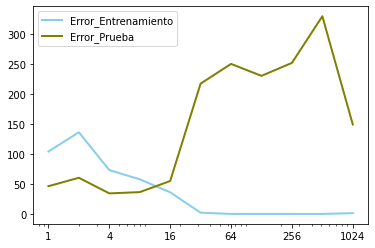

In [78]:
import matplotlib.pyplot as plt
plot(df)

Viendo el gráfico nos damos cuenta que el mejor modelo es aquel que tiene 4 neuronas. Con él, el error de generalización es el más bajo. Si seguimos aumentando la complejidad del modelo nos damos cuenta que el error en el set de Train disminuye, pero el error en el set de test aumenta. Esto quiere decir que se produce Overfiting con modelos más complejos (Podemos hablar de Overfiting cuando la línea que visualiza el error de test asciende por arriba de la línea que visualiza en error en el set de Train).